In [432]:
%matplotlib inline

import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score
from sklearn.datasets import load_breast_cancer, load_boston

from sklearn.ensemble import GradientBoostingClassifier

from sklearn import preprocessing
from sklearn import utils


# Always make it pretty.
plt.style.use('ggplot')

# We get some interger -> float typecast warning from sklean below, this keeps them out of our hair.
import warnings
warnings.filterwarnings('ignore')

import itertools


In [433]:
d = pd.read_csv('data/cleaned_data_together.csv')

In [434]:
def df_cleaner(df):
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    return df

In [435]:
df = df_cleaner(d)

In [436]:
df.head()

,DateTime,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF,DOY
0,2010-01-01,5.82,26.0317,2197157.0,3117.0,255035.0,1666520.0,1
1,2010-01-02,5.82,24.2249,2197157.0,3117.0,255035.0,1666520.0,2
2,2010-01-03,5.82,23.5537,2197157.0,3117.0,255035.0,1666520.0,3
3,2010-01-04,6.09,23.2831,2197157.0,3117.0,255035.0,1666520.0,4
4,2010-01-05,6.19,24.5469,2197157.0,3117.0,255035.0,1666520.0,5


In [437]:
y = df.pop('Henry Hub Price $/MMBtu').values
y

array([5.82, 5.82, 5.82, ..., 2.9 , 2.9 , 2.86])

In [497]:
test = np.array([0]+[(b - a)  for a, b in zip(y[::1], y[1::1])])
len(test), type(test)

(3357, numpy.ndarray)

In [498]:
test[:10]

array([ 0.  ,  0.  ,  0.  ,  0.27,  0.1 ,  0.28,  1.04, -0.95,  0.  ,
        0.  ])

No handles with labels found to put in legend.


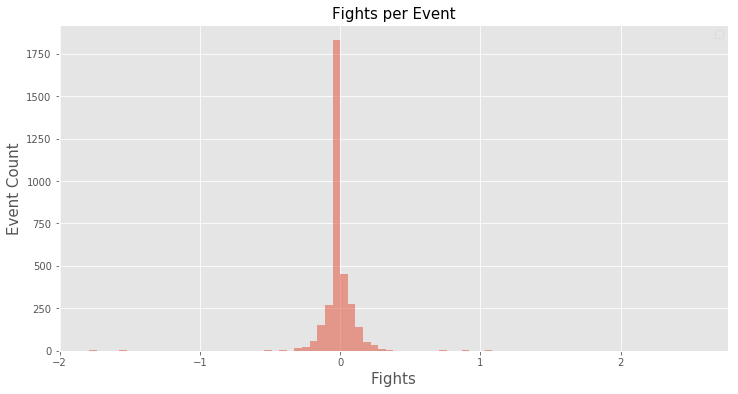

In [499]:
fig, ax = plt.subplots(figsize= (12,6))
ax.hist(test, bins = 80, alpha =0.5)
ax.set_title("Fights per Event", fontsize = 15)
ax.set_ylabel("Event Count", fontsize = 15)
ax.set_xlabel("Fights", fontsize = 15)
#plt.xticks(n.index, rotation='vertical')
ax.legend()
fig.show()

In [543]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X[0:size], X[size:len(X)], test[0:size], test[size:len(y)]

In [545]:

rfr = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=90,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

rfr.fit(X_train, y_train)
print("score:", rfr.score(X_test, y_test, sample_weight=None))

score: -0.5052703205419347


In [546]:
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

rfr.fit(X_train, y_train)
print("score:", rfr.score(X_test, y_test, sample_weight=None))

score: -0.08780765775558175


In [461]:
rr = np.array([[2,3,4],[7,6,5]])
rr

array([[2, 3, 4],
       [7, 6, 5]])

In [463]:
tt =np.array([[4,5,6]])

In [465]:
tt.shape, rr.shape

((1, 3), (2, 3))

In [459]:
np.append(rr, np.array([[4,5,6]]))

array([2, 3, 4, 7, 6, 5, 4, 5, 6])

In [487]:
history_y

array([0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.21])

In [509]:
y_test

array([-0.08,  0.03,  0.  ,  0.  ,  0.  ,  0.  ,  0.2 ,  0.06,  0.3 ,
        0.  ,  0.12,  0.  ,  0.  ,  0.  ,  0.31,  0.05, -0.12,  0.07,
        0.  ,  0.  , -0.15,  0.05, -0.1 ,  0.01, -0.05,  0.  ,  0.  ,
        0.04, -0.16,  0.11,  0.  ,  0.1 ,  0.  ,  0.  ,  0.  ,  0.1 ,
        0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.  , -0.3 ,  0.01,  0.  ,
       -0.04,  0.  ,  0.  , -0.24,  0.07,  0.06,  0.09,  0.  ,  0.  ,
        0.  ,  0.  ,  0.01, -0.11, -0.01, -0.02,  0.  ,  0.  , -0.07,
        0.  ,  0.1 ,  0.18, -0.13,  0.  ,  0.  , -0.09, -0.22,  0.15,
       -0.02,  0.  ,  0.  ,  0.  , -0.21,  0.11,  0.02,  0.06,  0.  ,
        0.  ,  0.  , -0.18, -0.08,  0.1 , -0.07, -0.13,  0.  ,  0.  ,
        0.  , -0.19, -0.04,  0.11,  0.  ,  0.  ,  0.  , -0.19,  0.1 ,
        0.  ,  0.05, -0.09,  0.  ,  0.  ,  0.18,  0.  , -0.09,  0.24,
        0.15,  0.  ,  0.  ,  0.06, -0.02,  0.  , -0.18,  0.01,  0.  ,
        0.  ,  0.08,  0.16, -0.07, -0.09,  0.04,  0.  ,  0.  , -0.03,
        0.01,  0.08,

In [538]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions = list()
for t in range(len(y_test)):
    rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)
    rfr_fit = rfr.fit(history_X, history_y)
    output = rfr_fit.predict(X_test[t].reshape((1,6)))
    yhat = output[0]
    predictions.append(yhat)
    obs = y_test[t]
    history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
    history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions)
error = mean_squared_error(y_test, predictions)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.07292


with bootstrap off, Test MSE: 0.04656

# Grid search work

In [581]:
model = RandomForestRegressor()
depth_param = np.arange(1, 12, 1)
num_samples_param = np.arange(5,95,10)
n_trees = np.arange(1,70, 10)
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [90, 100], #, 110
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5, 10], #, 50, 90
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200] #, 300, 1000, 2000
}
clf = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
clf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(clf.score(X_test, y_test)))

Accuracy score: -0.00144


param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90], #, 100, 110
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5, 10], #, 50, 90
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200] #, 300, 1000, 2000
}
Accuracy score: 0.00025

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90], #, 100, 110
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5], #, 10, 50, 90
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100] #, 200, 300, 1000, 2000
}
Accuracy score: -0.00237

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100], # , 110
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5, 10], #, 50, 90
    'min_samples_split': [8, 10, 12, 15],
    'n_estimators': [100, 200] #, 300, 1000, 2000
}
Accuracy score: -0.00337

In [579]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [582]:
best_rfr= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

best_rfr.fit(X_train, y_train)
print("score:", best_rfr.score(X_test, y_test))

score: -0.0752174669968022


In [583]:
better_rfr= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
better_rfr.fit(X_train, y_train)
print("score:", better_rfr.score(X_test, y_test))

score: -0.002040411695668931


In [584]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions = list()
for t in range(len(y_test)):
    rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
    rfr_fit = rfr.fit(history_X, history_y)
    output = rfr_fit.predict(X_test[t].reshape((1,6)))
    yhat = output[0]
    predictions.append(yhat)
    obs = y_test[t]
    history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
    history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions)
error = mean_squared_error(y_test, predictions)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.03257


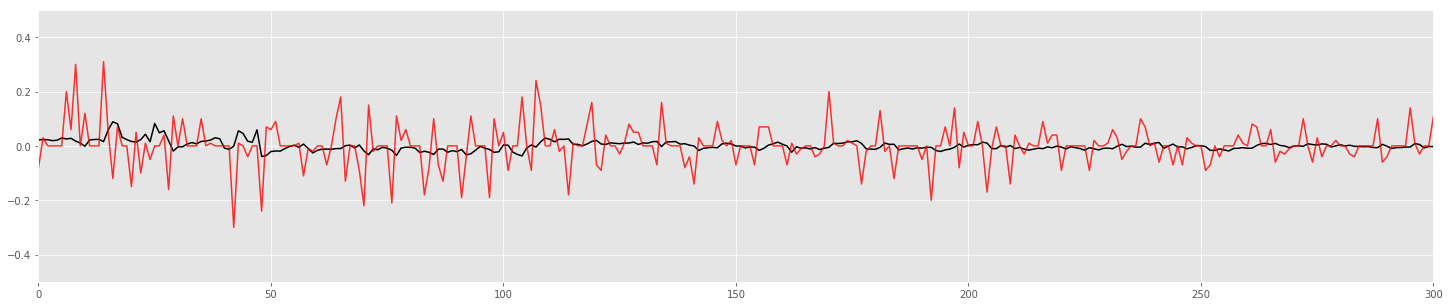

In [587]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(predictions, color='black')
axs.plot(y_test, color='red', alpha = 0.8)
axs.set_xlim([00, 300])
axs.set_ylim([-0.5, 0.5])
plt.show()

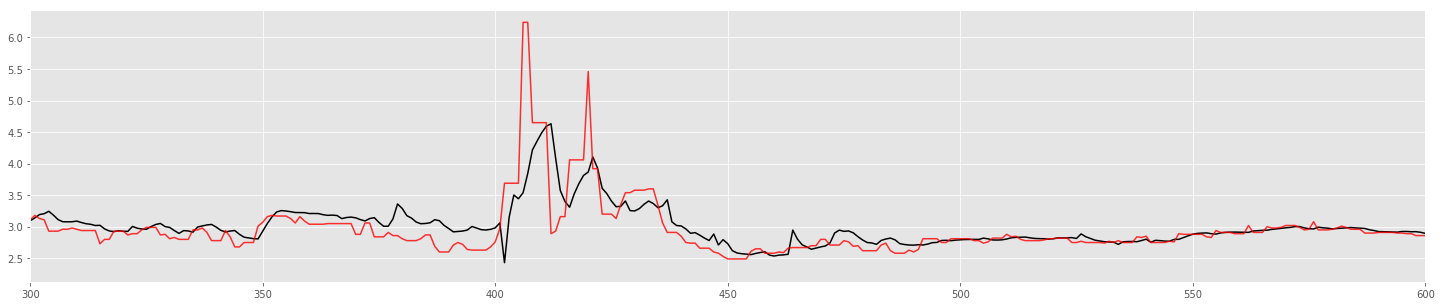

In [542]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(predictions, color='black')
axs.plot(y_test, color='red', alpha = 0.8)
axs.set_xlim([300, 600])
#axs.set_ylim([-0.5, 0.5])
plt.show()

In [535]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions = list()
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
       max_leaf_nodes=None, min_impurity_decrease=0.0,
       min_impurity_split=None, min_samples_leaf=3,
       min_samples_split=12, min_weight_fraction_leaf=0.0,
       n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
       verbose=0, warm_start=False)
rfr_fit = rfr.fit(X_train, y_train)
for t in range(len(y_test)):
    output = rfr_fit.predict(X_test[t].reshape((1,6)))
    yhat = output[0]
    predictions.append(yhat)
#     obs = y_test[t]
#     history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
#     history_y = np.append(history_y,obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
pred = np.array(predictions)
error = mean_squared_error(y_test, predictions)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 1.36728


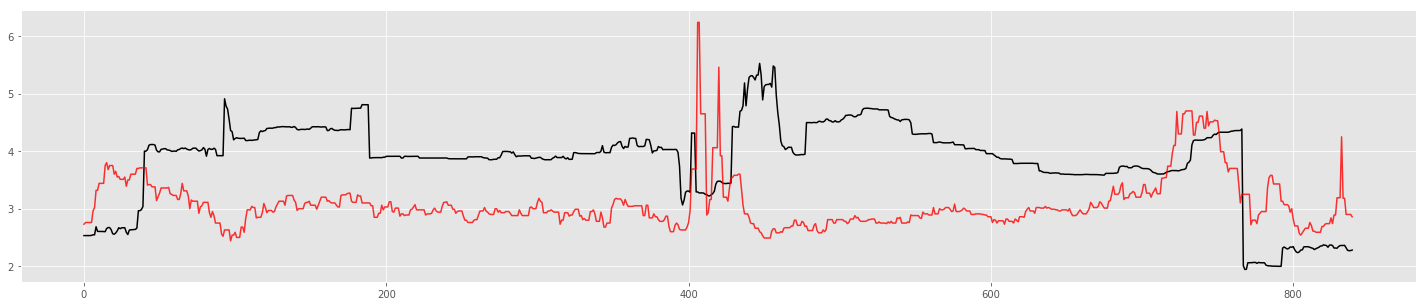

In [536]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(predictions, color='black')
axs.plot(y_test, color='red', alpha = 0.8)
# axs.set_xlim([400, 600])
# axs.set_ylim([-0.5, 0.5])
plt.show()

In [420]:
test = [0]+[(100*(b - a) / a) for a, b in zip(y[::1], y[1::1])]
len(test), type(test[0])

(3357, int)

In [198]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(test)
lab_enc.classes_.shape, lab_enc.classes_

((49,), array([-37, -28, -25, -24, -23, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,  16,
         19,  24,  28,  29,  33,  34,  37,  40,  47,  69]))

In [189]:
# tt = [-1.5, 0.2, 6, 4, -3]
# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(tt)
#list(encoded.classes_)
# le.transform(["tokyo", "tokyo", "paris"])
# encoded.inverse_transform([4])
#lab_enc.inverse_transform(4)

No handles with labels found to put in legend.


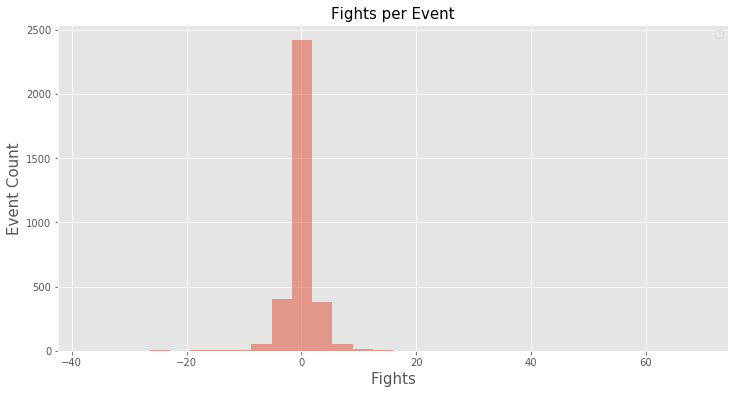

In [199]:
fig, ax = plt.subplots(figsize= (12,6))
ax.hist(test, bins = 30, alpha =0.5)
ax.set_title("Fights per Event", fontsize = 15)
ax.set_ylabel("Event Count", fontsize = 15)
ax.set_xlabel("Fights", fontsize = 15)
#plt.xticks(n.index, rotation='vertical')
ax.legend()
fig.show()

In [365]:
DateTime = df.pop('DateTime').values

In [308]:
X = df.values
X[0]

array([2.603170e+01, 2.197157e+06, 3.117000e+03, 2.550350e+05,
       1.666520e+06, 1.000000e+00])

In [270]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X[0:size], X[size:len(X)], encoded[0:size], encoded[size:len(y)]

(2517, 6)

In [273]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("score:", rf.score(X_test, y_test))

score: 0.5297619047619048


In [426]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X[0:size], X[size:len(X)], test[0:size], test[size:len(y)]
rfr = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=90,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

rfr.fit(X_train, y_train)
print("score:", rfr.score(X_test, y_test, sample_weight=None))

score: -0.6174756117807165


In [430]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X[0:size], X[size:len(X)], test[0:size], test[size:len(y)]
model = RandomForestRegressor()
depth_param = np.arange(80, 90, 1)
num_samples_param = np.arange(5,95,10)
n_trees = np.arange(1,70, 10)
parameters = {'max_depth' : depth_param,
             'min_samples_leaf' : num_samples_param,
             'n_estimators': n_trees}
clf = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
clf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(clf.score(X_test, y_test)))

Accuracy score: 0.00562


In [428]:
best_rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

best_rf.fit(X_train, y_train)

ValueError: max_features must be in (0, n_features]

In [429]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X[0:size], X[size:len(X)], encoded[0:size], encoded[size:len(y)]
model = RandomForestClassifier()
depth_param = np.arange(1, 12, 1)
num_samples_param = np.arange(5,95,10)
n_trees = np.arange(1,70, 10)
parameters = {'max_depth' : depth_param,
             'min_samples_leaf' : num_samples_param,
             'n_estimators': n_trees}
clf = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
clf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(clf.score(X_test, y_test)))

Accuracy score: 0.583


In [371]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [377]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions = list()
for t in range(len(y_test)):
    rf = RandomForestClassifier()
    rf_fit = rf.fit(history_X, history_y)
    output = rf_fit.predict(X_test[t].reshape((1,6)))
    yhat = output[0]
    predictions.append(yhat)
    obs = y_test[t]
    history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
    history_y = np.append(history_y, obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
predictions= lab_enc.inverse_transform(np.array(predictions))
label = lab_enc.inverse_transform(y_test)
error = mean_squared_error(label/100, predictions/100)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.00368


In [309]:
size = int(len(X) * 0.75)
y_pass, y_future =y[0:size],y[size:len(y)]

In [311]:
y_future.shape

(840,)

In [323]:
label[:10]

array([-2,  1,  0,  0,  0,  0,  7,  2,  9,  0])

In [324]:
y_future[0]

2.73

In [332]:
y_future[0] +((label[1]/100)*y_future[0])

2.7573

In [387]:
test1 = [y_future[0]]+[a +(a * (b/100)) for a, b in zip(y_future[::1], label[1::1])]

In [388]:
test1[:10]

[2.73, 2.7573, 2.76, 2.76, 2.76, 2.76, 2.9532, 3.0192, 3.2918, 3.32]

In [384]:
y_future[:10]

array([2.73, 2.76, 2.76, 2.76, 2.76, 2.76, 2.96, 3.02, 3.32, 3.32])

In [389]:
mean_squared_error(y_future, test1)

0.0001489223214285713

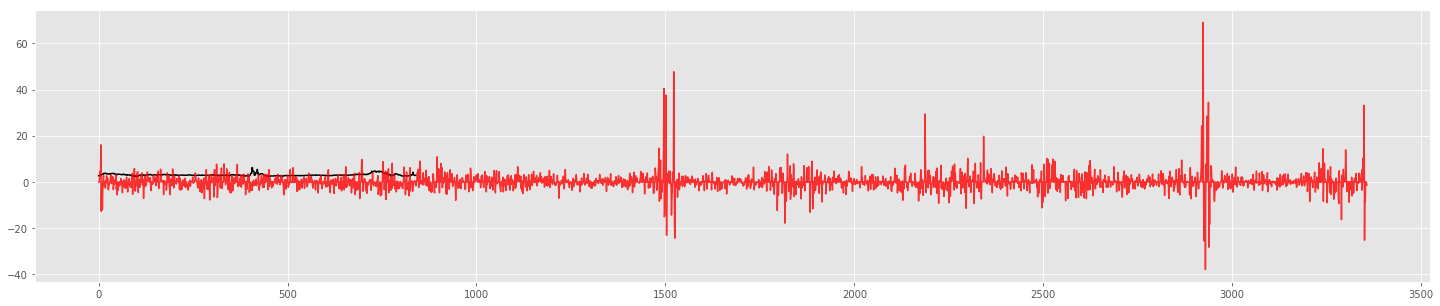

In [431]:
fig, axs = plt.subplots(figsize=(25, 5))
axs.plot(y_future, color='black')
axs.plot(test, color='red', alpha = 0.8)
#axs.set_xlim([400, 500])
#axs.set_ylim([5.0, 6.0])
plt.show()

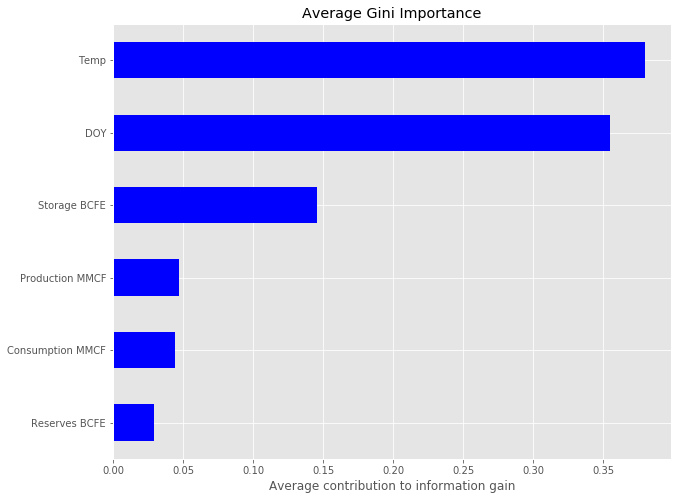

In [367]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=df.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

In [394]:
X_train, X_test, y_train, y_test 
history_X = X_train
history_y = y_train
predictions = list()
for t in range(len(y_test)):
    rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
    rf_fit = rf.fit(history_X, history_y)
    output = rf_fit.predict(X_test[t].reshape((1,6)))
    yhat = output[0]
    predictions.append(yhat)
    obs = y_test[t]
    history_X = np.append(history_X, X_test[t].reshape((1,6)), axis=0)
    history_y = np.append(history_y, obs)
    #print('{} of {} predicted={}, expected={}'.format(t, len(y_test), yhat, obs))
predictions= lab_enc.inverse_transform(np.array(predictions))
label2 = lab_enc.inverse_transform(y_test)
error = mean_squared_error(label2/100, predictions/100)
print('Test MSE: %.5f' % error)

# plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test MSE: 0.00198


In [391]:
size = int(len(X) * 0.75)
y_pass, y_future =y[0:size],y[size:len(y)]
test2 = [y_future[0]]+[a +(a * (b/100)) for a, b in zip(y_future[::1], label2[1::1])]
mean_squared_error(y_future, test2)

0.0001489223214285713

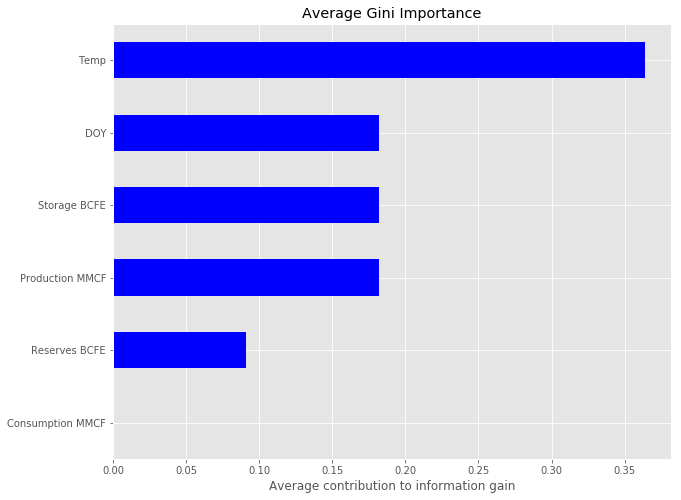

In [392]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=df.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

In [395]:
cm = confusion_matrix(label2, predictions)

In [401]:
precision_score(label2, predictions, average= 'weighted')

0.34027777777777785

In [404]:

recall_score(label2, predictions, average= 'weighted')

0.5833333333333334

In [405]:
#taken from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


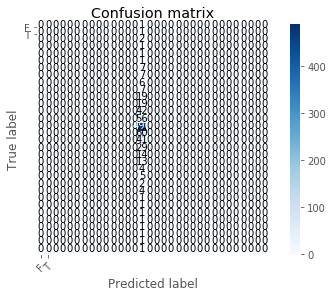

In [406]:
plot_confusion_matrix(cm,['F', 'T'])

In [407]:
size = int(len(X) * 0.75)
X_train, X_test, y_train, y_test = X[0:size], X[size:len(X)], encoded[0:size], encoded[size:len(y)]

In [ ]:
loss='deviance', learning_rate=.0007, n_estimators=2500, \
                                 min_samples_leaf=10, subsample=.4, max_depth=2)

In [ ]:
(loss='deviance', learning_rate=.07, n_estimators=50, \
                                 min_samples_leaf=10, subsample=.5, max_depth=2)\

In [ ]:
loss='deviance', learning_rate=0.01, n_estimators=1000, \
                                 subsample=0.5, min_samples_leaf=12, max_depth=2, random_state=13)

In [411]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1), df['Survived'], test_size=0.2, random_state=42)
gbl = GradientBoostingClassifier(loss='deviance', learning_rate=0.0007, n_estimators=2500, \
                                 subsample=0.5, min_samples_leaf=12, max_depth=2, random_state=13)\
                                .fit(X_train, y_train)
    
("GBLR Prediction accuracy: ", accuracy_score(y_test, gbl.predict(X_test)))

('GBLR Prediction accuracy: ', 0.5833333333333334)

In [414]:
model = GradientBoostingClassifier()
depth_param = np.arange(1, 5, 1)
num_samples_param = np.arange(5,15,1)
n_trees = np.arange(1000,3000, 500)
learning = np.arange(0.0001,0.0007, 0.0002)
sub = np.arange(0.1,0.5, 0.1)
parameters = {'max_depth' : depth_param,
             'min_samples_leaf' : num_samples_param,
             'n_estimators': 2,
             'learning_rate': 2500,
             'subsample': 0.5}
clf = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
clf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(clf.score(X_test, y_test)))

KeyboardInterrupt: 